In [1]:
import warnings 
warnings.filterwarnings('ignore')

# data processing and visualization packages 
import numpy as np
import pandas as pd 
import csv 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# modeling packages

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# to evaluate classification models
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score

In [2]:
file1 = pd.read_csv('dataset.csv',sep=';\s*',skipinitialspace=True,quoting=csv.QUOTE_NONE,engine='python')
file1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
file1.y = file1.y.replace({"yes": "1","no":"0"})

In [218]:
print(file1.describe().transpose())
print(file1.shape)
print(file1.info())

# pdays has a maximum value of 999 which is nan 

                  count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            99

In [219]:
# finding the NAN values for the data 
file1.apply(lambda x : sum(x.isna()))

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

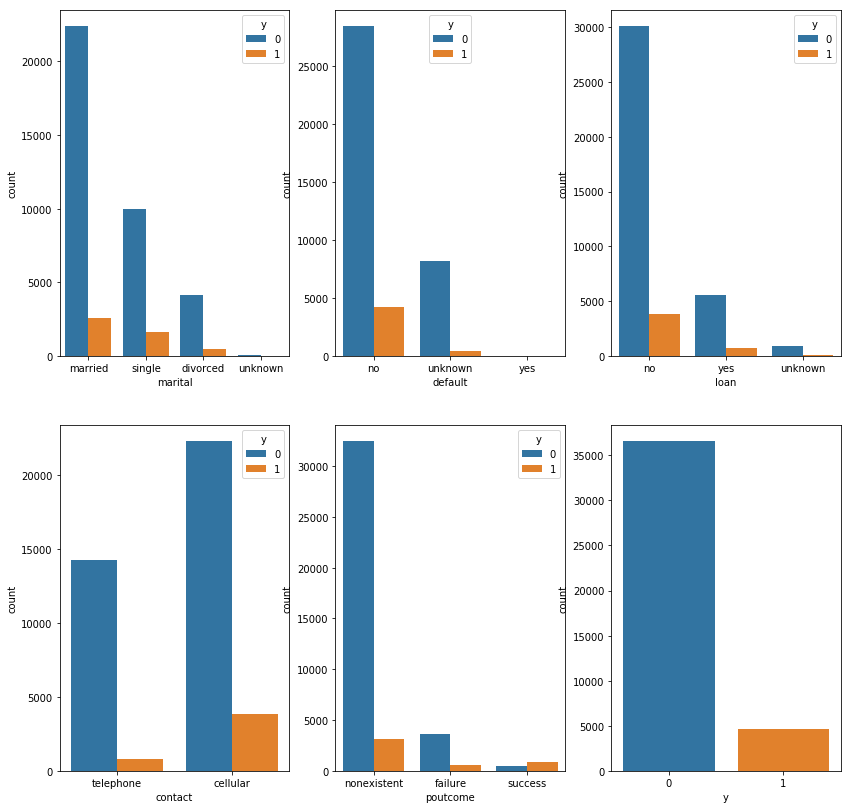

In [266]:
fig,ax = plt.subplots(2,3,figsize=(14,14))

sns.countplot(file1['marital'],hue=file1['y'],ax=ax[0,0])
sns.countplot(file1['default'],hue=file1['y'],ax=ax[0,1])
sns.countplot(file1['loan'],hue=file1['y'],ax=ax[0,2])
sns.countplot(file1['contact'],hue=file1['y'],ax=ax[1,0])
sns.countplot(file1['poutcome'],hue=file1['y'],ax=ax[1,1])
sns.countplot(file1['y'],ax=ax[1,2])


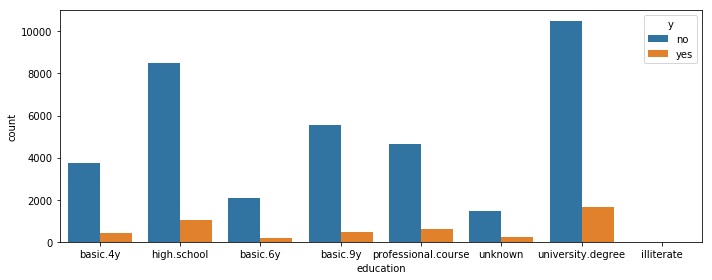

In [270]:
plt.figure(figsize=(10,4))
sns.countplot(x='education',hue='y',data=df)
plt.tight_layout()

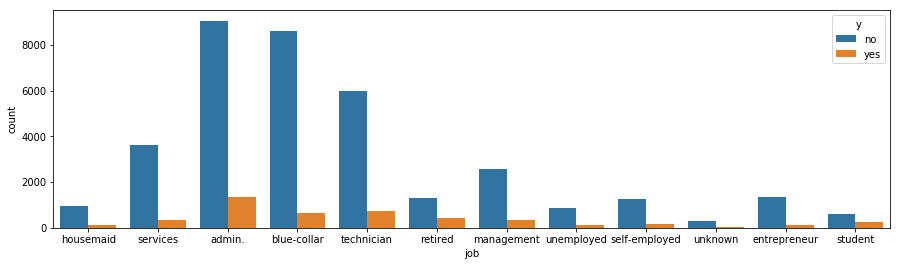

In [272]:
plt.figure(figsize=(15,4))
sns.countplot(x='job',hue='y',data=df)

In [225]:
df_1 = file1.select_dtypes(include=['object'])
df_1.isin(['unknown']).sum(axis=0)

job             330
marital          80
education      1731
default        8597
housing         990
loan            990
contact           0
month             0
day_of_week       0
poutcome          0
y                 0
dtype: int64

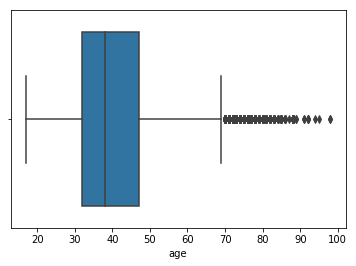

In [226]:
sns.boxplot(x=df['age'], data=df)
# age has outliers but that is excepted as it's there will be people who are older

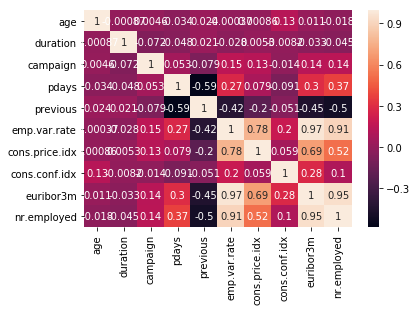

In [227]:
corr = df.corr()
sns.heatmap(corr,annot=True)
# most of the data is not correlated and which is a good thing as they are not dependent 
# previous and pdays are correlated most as it make sense and also campaign and day as they are little correlated as well 

In [228]:
#Group numerical variables by mean for the classes of Y variable
np.round(file1.groupby(["y"]).mean() ,1)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.9,220.8,2.6,984.1,0.1,0.2,93.6,-40.6,3.8,5176.2
1,40.9,553.2,2.1,792.0,0.5,-1.2,93.4,-39.8,2.1,5095.1


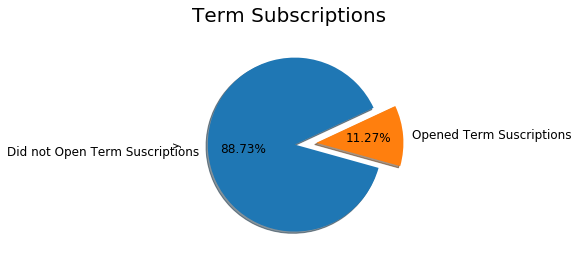

In [261]:
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Term Subscriptions', fontsize=20)

file1["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True,
                                             labels=labels, fontsize=12, startangle=25)

# looking at the below Graph most of the customers doesn't have the term deposits which is 88.3% 
# and only a handfull of custromers have opened term deposits 

The mean balance is higher for customers who subscribe to the term deposit compared to those who dont

number of days that passed by after the client was last contacted from a previous campaign is higher for people who have subscribed

number of contacts performed before this campaign is also higher for customers who subscribe
All of the above facts indicate that customers with a higher balance and those who have been contacted frequently before the campaign tend to subscribe for the term deposit


In [233]:
print(pd.crosstab(file1['job'], file1['y'], normalize='index').sort_values
      (by='1',ascending=False))

print(pd.crosstab(file1['default'], file1['y'], normalize='index').sort_values(by='1',ascending=False ))
print(file1['default'].value_counts(normalize=True))


y                     0         1
job                              
student        0.685714  0.314286
retired        0.747674  0.252326
unemployed     0.857988  0.142012
admin.         0.870274  0.129726
management     0.887825  0.112175
unknown        0.887879  0.112121
technician     0.891740  0.108260
self-employed  0.895144  0.104856
housemaid      0.900000  0.100000
entrepreneur   0.914835  0.085165
services       0.918619  0.081381
blue-collar    0.931057  0.068943
y              0        1
default                  
no       0.87121  0.12879
unknown  0.94847  0.05153
yes      1.00000  0.00000
no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64


The highest conversion is for students (28%) and lowest is for blue-collar(7%)
                                                            
Since default - yes is only 2% of the data and the conversion is also comparitively lower for 
default - yes, we can remove this column
                                                                           

In [4]:
file1.drop(['default'], axis=1, inplace=True)
file1.drop(['duration'], inplace=True, axis=1)
#highly affects the output as per the data set description 

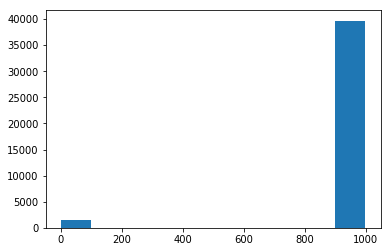

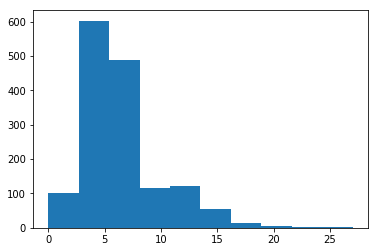

In [235]:
file1.columns
plt.hist(df['pdays'])
plt.show()
plt.hist(df.loc[df.pdays != 999, 'pdays'])
plt.show()

#pdays has lot of missing values , we need to impute the pdays and as this is a important feature 
#we can convert this to categorical column by defining range of pdays 

In [5]:
file1['pdays_missing'] = 0
file1['pdays_less_5'] = 0
file1['pdays_greater_15'] = 0
file1['pdays_bet_5_15'] = 0

file1['pdays_missing'][file1['pdays']==999] = 1
file1['pdays_less_5'][file1['pdays']<5] = 1
file1['pdays_greater_15'][(file1['pdays']>15) & (file1['pdays']<999)] = 1
file1['pdays_bet_5_15'][(file1['pdays']>=5)&(file1['pdays']<=15)]= 1

df_dropped_pdays = file1.drop('pdays', axis=1);

In [6]:
y = df_dropped_pdays["y"]
X = df_dropped_pdays.drop("y" , axis=1)

# converting the categorical columns using get dummies method 
X = pd.get_dummies(X, drop_first=True)


In [7]:
#standardize the features 
sc = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [8]:
y_test.shape

(12357,)

In [240]:
X_train.shape,X_test.shape

((28831, 53), (12357, 53))

In [9]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
model_score=model.score(X_test,y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_predict))

#looking at the results of the logistic regression , model has an accuracy of 89% which might look good from outside 
# let's analyze the confusion matrix to understand the stats little better 
# from the below confusion matrix we have around 10965 as no term deposit yet , 
# but the model has predicted that only 10836 of them have no term deposit 
# for example recall of no term deposit = TP/(TP+FN) = 10,836/(10836+129) = 98.8% 
# but for similarly recall of term deposit = 1122/(1124+270) = 19% , which is way less and not able to predict right 

c:\users\avina\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8933398073966173
[[10733   232]
 [ 1086   306]]


In [242]:
# Plain Decision Tree classifier 

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [243]:
y_pred = dt_model.predict(X_test)
print("Trianing set score :", dt_model.score(X_train, y_train))
print("Testing set score :", dt_model.score(X_test , y_test))

Trianing set score : 0.9954562796989351
Testing set score : 0.8383911952739338


In [245]:
#Confusion matrix for DT

print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

print("Accuracy: ", accuracy_score(y_test, y_pred))

print("Recall Score: ",recall_score(y_test, y_pred,average="binary", pos_label="1"))

Confusion Matrix: [[9869 1096]
 [ 901  491]]
Accuracy:  0.8383911952739338
Recall Score:  0.35272988505747127


In [10]:
# Pruning the DT 

clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [247]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)

feature_cols = X_train.columns
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)[0:10] #Top 10 features

,0
nr.employed,0.762244
cons.conf.idx,0.099106
poutcome_success,0.079671
cons.price.idx,0.029867
euribor3m,0.016643
contact_telephone,0.009324
day_of_week_mon,0.003145
month_jul,0.000000
education_university.degree,0.000000
education_unknown,0.000000


In [11]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

acc_DT = accuracy_score(y_test, preds_pruned)
recall_DT = recall_score(y_test, preds_pruned, average="binary", pos_label="1")

#Storing the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT, 'recall': recall_DT})
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf


,Method,accuracy,recall
0,Decision Tree,0.897629,0.161638


In [250]:
# random tree model

rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)


pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
recall_RF = recall_score(y_test, pred_RF, average="binary", pos_label="1")

tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF], 'recall': [recall_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf

,Method,accuracy,recall
0,Decision Tree,0.897629,0.161638
0,Random Forest,0.891640,0.290230


In [251]:
## Applying Adaboost Ensemble Algorithm for the same data and printing the accuracy.

abcl = AdaBoostClassifier( n_estimators= 200, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
recall_AB = recall_score(y_test, pred_AB, pos_label='1')

tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB], 'recall':[recall_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf


,Method,accuracy,recall
0,Decision Tree,0.897629,0.161638
0,Random Forest,0.891640,0.290230
0,Adaboost,0.897872,0.188218


In [252]:
## Applying Bagging Algorithm for the same data and printing the accuracy.

bgcl = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
recall_BG = recall_score(y_test, pred_BG, pos_label='1')

tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG], 'recall':[recall_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf


,Method,accuracy,recall
0,Decision Tree,0.897629,0.161638
0,Random Forest,0.891640,0.290230
0,Adaboost,0.897872,0.188218
0,Bagging,0.891398,0.297414


In [253]:
## Applying Gradient Boosting Ensemble Algorithm for the same data and printing the accuracy.
gbcl = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
recall_GB = recall_score(y_test, pred_GB, pos_label='1')

tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB], 'recall':[recall_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy', 'recall']]
resultsDf


,Method,accuracy,recall
0,Decision Tree,0.897629,0.161638
0,Random Forest,0.891640,0.290230
0,Adaboost,0.897872,0.188218
0,Bagging,0.891398,0.297414
0,Gradient Boost,0.899895,0.251437


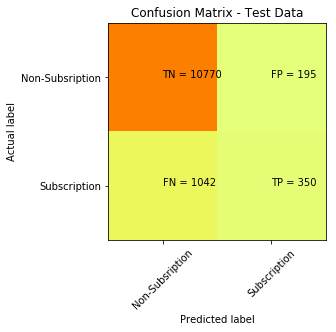

In [254]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test, pred_GB)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non-Subsription','Subscription']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [256]:
# Defining the variables to calculate ROC

pred_GB1 = gbcl.predict_proba(X_test)[:, 1]
pred_bag1 = bgcl.predict_proba(X_test)[:, 1]
pred_ada1 = abcl.predict_proba(X_test)[:, 1]
pred_RF1 = rfcl.predict_proba(X_test)[:, 1]

grd_fpr, grd_tpr, thresold = roc_curve(y_test, pred_GB1,pos_label='1')
bag_fpr, bag_tpr, bag_threshold = roc_curve(y_test, pred_bag1,pos_label='1')
ada_fpr, ada_tpr, ada_threshold = roc_curve(y_test, pred_ada1,pos_label='1')
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, pred_RF1,pos_label='1')

print('Gradient Boost Classifier Score: ', roc_auc_score(y_test, pred_GB1))
print('bagging Classifier Score: ', roc_auc_score(y_test, pred_bag1))
print('ada boost Classifier: ', roc_auc_score(y_test, pred_ada1))
print('Random Forest Classifier: ', roc_auc_score(y_test, pred_RF1))


Gradient Boost Classifier Score:  0.795943991068761
bagging Classifier Score:  0.7703324907883495
ada boost Classifier:  0.7868471259126478
Random Forest Classifier:  0.7607759275856827


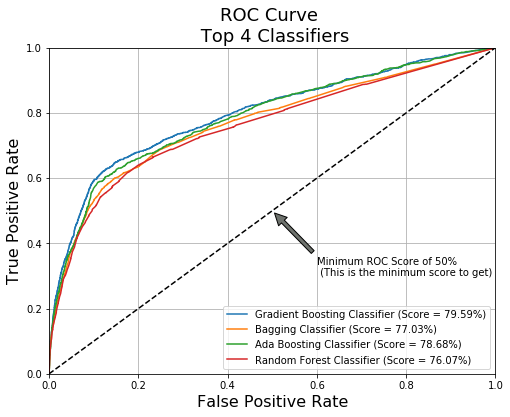

In [260]:
def graph_roc_curve_multiple(grd_fpr, grd_tpr, bag_fpr, bag_tpr, ada_fpr, ada_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(grd_fpr, grd_tpr, label='Gradient Boosting Classifier (Score = 79.59%)')
    plt.plot(bag_fpr, bag_tpr, label='Bagging Classifier (Score = 77.03%)')
    plt.plot(ada_fpr, ada_tpr, label='Ada Boosting Classifier (Score = 78.68%)')
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (Score = 76.07%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    plt.grid(True)
    
graph_roc_curve_multiple(grd_fpr, grd_tpr, bag_fpr, bag_tpr, ada_fpr, ada_tpr)
plt.show()

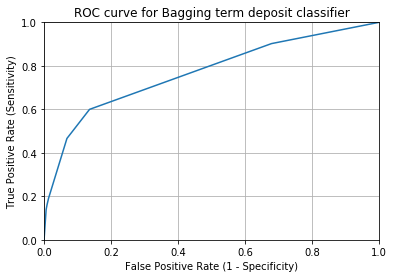

In [14]:
#ROC curve for Bagging classifier 

preds_pruned = clf_pruned.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_pruned,pos_label='1')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Bagging term deposit classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [20]:
preds_pruned

array([0.23809524, 0.17257143, 0.06774905, ..., 0.06774905, 0.06774905,
       0.03441773])

In [205]:
y_test.value_counts()

0    10965
1     1392
Name: y, dtype: int64

In [ ]:
# bank should consider restricting the number of calls may be not more than 3 calls should be applied to same customer
# in order to save time and effort , the more we call the same client the likely he/she will decline to open term deposit

# age category is another factor that should be considered for next campaign , bank should aim at clients in their 20s or younger
# , they have a better chance of subscribing to term deposit 

# another thing to be considered is occupation , potential clients include the one's with stable jobs who are in management , admin
# tech support , blue caller 

# work on a strategy to create a question for calls , because duration of call has positive effect on term deposits , to make 
# most of the conversation it's important to keep client engaged in the conversion by asking right questions which will help client 
# decide whether to opt for term deposit 

# finally identify the clients with higher duration with the bank as there's a high likelihood that they will choose term deposit 

# manager should consider all of these for next marketing campaign 